# Try RandomForestRegressor with grid of various parameters

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
training_data = pd.read_csv('../Datasets/training_data_full.csv')

In [3]:
non_numerical_features = set([
    'StateAbbr',
    'StateDesc',
    'CityName',
    'CountyFIPS',
    'TractFIPS'
])

target_features = set([
    'diabetes_change_rate_2020'
])

numerical_features = list(
    set(training_data.columns) - non_numerical_features - target_features
)

In [4]:
features = training_data[numerical_features]
labels = training_data['diabetes_change_rate_2020']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

In [26]:
regr = RandomForestRegressor(max_depth=60, n_estimators=1000, max_features = 2, random_state=15, n_jobs=16)

In [27]:
history = regr.fit(X_train, Y_train)

Train R2 score is 0.89442
Test R2 score is 0.25221


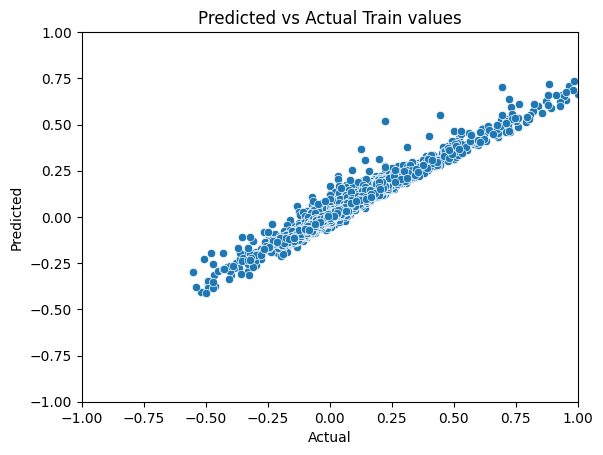

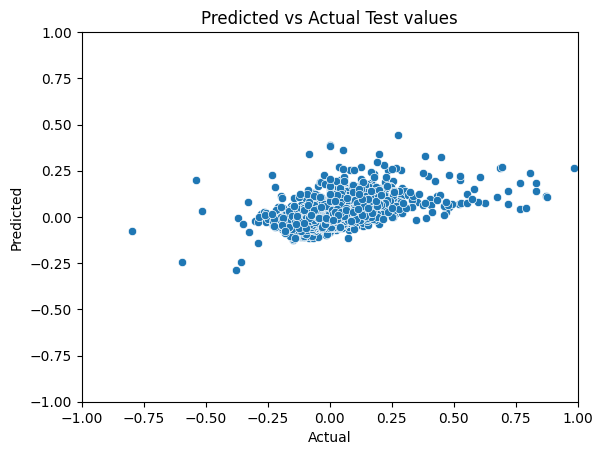

In [28]:
%run -i ./Model_Eval.ipynb
evaluate_regression_model(
    regr,
    None,
    X_train,
    Y_train,
    X_test,
    Y_test
)

In [9]:
regr.feature_importances_

array([0.02036863, 0.01460614, 0.02059665, 0.03077644, 0.01311721,
       0.01624529, 0.0156248 , 0.03488779, 0.02560212, 0.03107324,
       0.01681102, 0.01690154, 0.01467326, 0.03419525, 0.02400895,
       0.04087169, 0.01409392, 0.01647177, 0.01526571, 0.01743696,
       0.03061188, 0.03725039, 0.04269448, 0.01718894, 0.01398586,
       0.01974033, 0.01825655, 0.04072236, 0.02918593, 0.01601385,
       0.01450787, 0.01434658, 0.03489002, 0.04182357, 0.03464241,
       0.03438139, 0.01571725, 0.02705362, 0.01567815, 0.01991329,
       0.02037706, 0.02738985])

In [10]:
# plt.figure(figsize=(15,10))
# plt.barh(numerical_features, regr.feature_importances_)